In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Bengaluru_House_Data_Cleaned (1).csv')
print("Shape:", df.shape)
print(df.head())

Shape: (13250, 9)
              area_type   availability                  location   size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II  2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 BHK   
2        Built-up  Area  Ready To Move               Uttarahalli  3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli  3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur  2 BHK   

   total_sqft  bath  balcony   price  Distance_to_nearest_MRT_station_m  
0      1056.0     2        1   39.07                            1249.45  
1      2600.0     5        3  120.00                            3901.43  
2      1440.0     2        3   62.00                            1678.39  
3      1521.0     3        1   95.00                            3197.32  
4      1200.0     2        1   51.00                            2312.04  


In [3]:
print(df.describe())

         total_sqft          bath       balcony         price  \
count  13250.000000  13250.000000  13250.000000  13250.000000   
mean    1556.092659      2.667623      1.604604    111.881419   
std     1229.977590      1.217659      0.802269    145.709380   
min        1.000000      1.000000      0.000000      8.000000   
25%     1100.000000      2.000000      1.000000     50.000000   
50%     1275.500000      2.000000      2.000000     71.685000   
75%     1679.750000      3.000000      2.000000    120.000000   
max    52272.000000     10.000000      3.000000   2912.000000   

       Distance_to_nearest_MRT_station_m  
count                       13250.000000  
mean                         4243.558848  
std                          2840.654535  
min                           300.740000  
25%                          1560.705000  
50%                          3777.970000  
75%                          6554.602500  
max                          9998.020000  


In [4]:
print(df.isnull().sum())

area_type                            0
availability                         0
location                             0
size                                 0
total_sqft                           0
bath                                 0
balcony                              0
price                                0
Distance_to_nearest_MRT_station_m    0
dtype: int64


In [5]:
cols = ['total_sqft', 'Distance_to_nearest_MRT_station_m', 'price']
print("\nSkewness:")
print(df[cols].skew())



Skewness:
total_sqft                           15.523273
Distance_to_nearest_MRT_station_m     0.420256
price                                 7.623535
dtype: float64


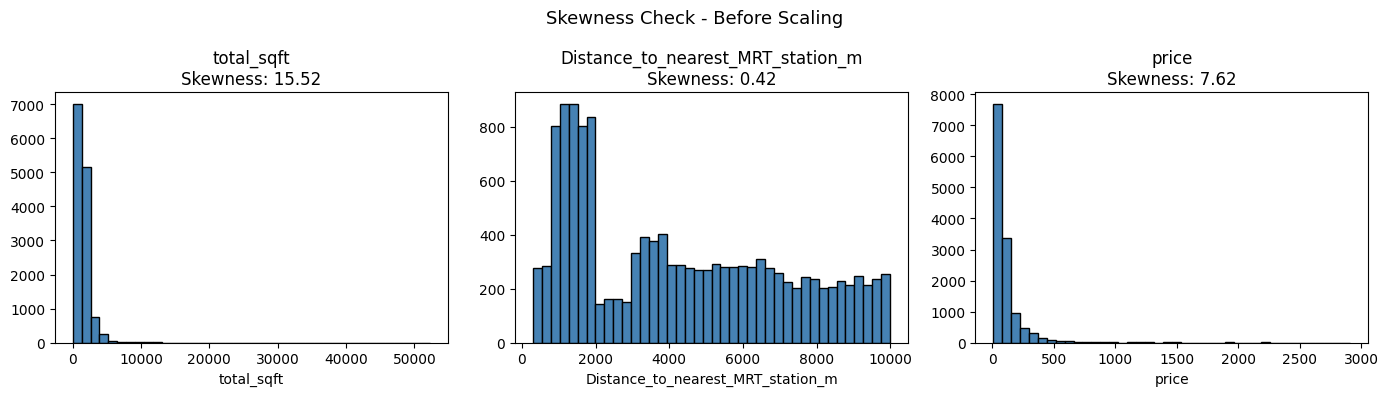

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for i, col in enumerate(cols):
    axes[i].hist(df[col], bins=40, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{col}\nSkewness: {df[col].skew():.2f}')
    axes[i].set_xlabel(col)
plt.suptitle('Skewness Check - Before Scaling', fontsize=13)
plt.tight_layout()
plt.show()

# **OUTLIER DETECTION**

# BOX-PLOT

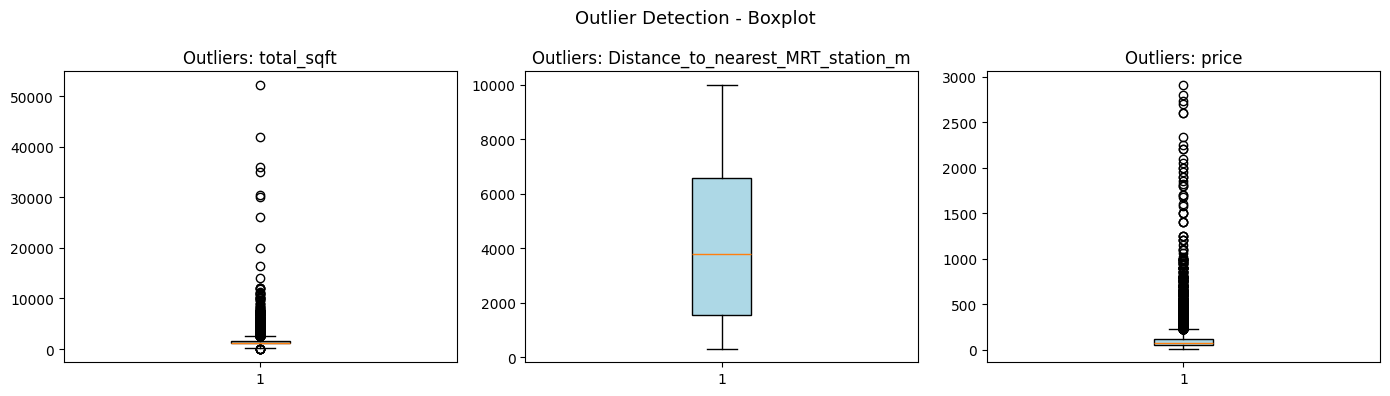

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for i, col in enumerate(cols):
    axes[i].boxplot(df[col], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Outliers: {col}')
plt.suptitle('Outlier Detection - Boxplot', fontsize=13)
plt.tight_layout()
plt.show()

In [8]:
print("\n── Outlier Count using IQR ──")
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers "
          f"(lower bound: {lower:.2f}, upper bound: {upper:.2f})")


── Outlier Count using IQR ──
total_sqft: 1161 outliers (lower bound: 230.38, upper bound: 2549.38)
Distance_to_nearest_MRT_station_m: 0 outliers (lower bound: -5930.14, upper bound: 14045.45)
price: 1254 outliers (lower bound: -55.00, upper bound: 225.00)


In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [10]:
sample = df[['total_sqft']].copy()

std_scaled   = StandardScaler().fit_transform(sample)
robust_scaled = RobustScaler().fit_transform(sample)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [13]:

X = df[['total_sqft', 'Distance_to_nearest_MRT_station_m', 'bath', 'balcony']]
y = df['price']


x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nTrain: {x_train.shape[0]} rows | Test: {x_test.shape[0]} rows")


Train: 10600 rows | Test: 2650 rows


In [14]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)

In [15]:
print("\nSkewness after RobustScaler:")
print(pd.DataFrame(x_train_scaled, columns=X.columns).skew())


Skewness after RobustScaler:
total_sqft                           16.693109
Distance_to_nearest_MRT_station_m     0.421113
bath                                  1.959936
balcony                              -0.056499
dtype: float64


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(x_test_scaled)

In [20]:
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"\nMAE: {mae:.2f}")
print(f"RMSE:{rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MAE: 47.62
RMSE:118.42
R2 Score: 0.43


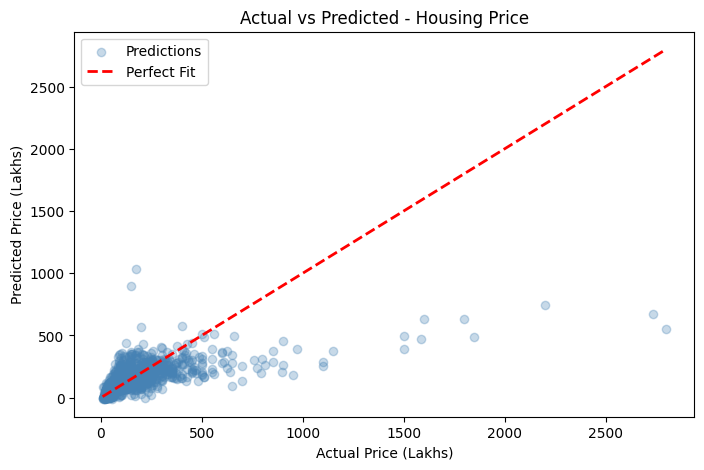

In [21]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.3, color='steelblue', label='Predictions')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Price (Lakhs)")
plt.ylabel("Predicted Price (Lakhs)")
plt.title("Actual vs Predicted - Housing Price")
plt.legend()
plt.show()

In [22]:
threshold = 60
affordable = (y_pred <= threshold).sum()
expensive  = (y_pred > threshold).sum()

print(f"\nSDG 11 Analysis:")
print(f"Affordable units (<=60L): {affordable}")
print(f"Expensive units  (>60L):  {expensive}")




SDG 11 Analysis:
Affordable units (<=60L): 400
Expensive units  (>60L):  2250


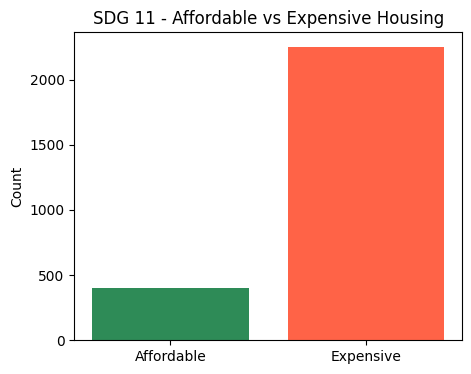

In [23]:
plt.figure(figsize=(5, 4))
plt.bar(['Affordable', 'Expensive'], [affordable, expensive],
        color=['seagreen', 'tomato'])
plt.title('SDG 11 - Affordable vs Expensive Housing')
plt.ylabel('Count')
plt.show()

# **PREDICTION**

In [24]:
sqft     = float(input("Enter Square Footage (sqft): "))
mrt_dist = float(input("Enter Distance to MRT Station (meters): "))
bath     = float(input("Enter Number of Bathrooms: "))
balcony  = float(input("Enter Number of Balconies: "))

user_input = pd.DataFrame({
    'total_sqft': [sqft],
    'Distance_to_nearest_MRT_station_m': [mrt_dist],
    'bath':[bath],
    'balcony':[balcony]
})

user_scaled = scaler.transform(user_input)
predicted_price = model.predict(user_scaled)[0]

print(f"Predicted Price: Rs {predicted_price:.2f} Lakhs")

if predicted_price <= 60:
    print("Status: Affordable")
else:
    print("Status: Expensive")

Enter Square Footage (sqft): 1200
Enter Distance to MRT Station (meters): 1
Enter Number of Bathrooms: 2
Enter Number of Balconies: 2
Predicted Price: Rs 62.21 Lakhs
Status: Expensive
